In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

- we want to see country level variations in pisciculture in freshwater. 
- which species are top 3 for africa and how do their production levels vary between countries

In [2]:
aquaculture_quantity_value = pd.read_csv("../data/Aquaculture_Quantity_Code_Merged.csv", 
                                         usecols = ['PERIOD', 'Quantity', 'Country', 'WaterArea', 'Species', 'Scientific_Name', 'Environment'])
aquaculture_quantity_value.rename(columns={'Quantity': 'Tonnes'}, inplace=True)
print(aquaculture_quantity_value.shape)
population_by_country = pd.read_csv("../data/Population_by_Country.csv")
print(population_by_country.shape)

(96571, 7)
(235, 2)


In [3]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, population_by_country)
aquaculture_quantity_value['Population'] = aquaculture_quantity_value['Population'] / 1000000
aquaculture_quantity_value.head()

,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346


In [4]:
aquaculture_quantity_value['Tonnes_Per_Million_People'] = aquaculture_quantity_value['Tonnes']  / aquaculture_quantity_value['Population']
#aquaculture_quantity_value.drop(['Tonnes', 'Population'], axis = 1, inplace = True)
aquaculture_quantity_value.head()

,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population,Tonnes_Per_Million_People
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,205.505777
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,204.221366
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,202.936955
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,178.533144
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,156.698155


In [5]:
africa_asia_inland = aquaculture_quantity_value[aquaculture_quantity_value['WaterArea']
                                                .isin(['Asia - Inland waters', 'Africa - Inland waters'])]
africa_asia_inland.shape

(22960, 9)

In [6]:
africa_inland = africa_asia_inland[africa_asia_inland['WaterArea'] == 'Africa - Inland waters']
asia_inland = africa_asia_inland[africa_asia_inland['WaterArea'] == 'Asia - Inland waters']
print(africa_inland.shape)
print(asia_inland.shape)
africa_inland.head()
asia_inland.head()

(7376, 9)
(15584, 9)


,PERIOD,Tonnes,Country,WaterArea,Environment,Species,Scientific_Name,Population,Tonnes_Per_Million_People
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,205.505777
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,204.221366
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,202.936955
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,178.533144
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38.928346,156.698155


In [7]:
# get countries with a minimum production level
total_production_africa_country = (africa_inland
                            .groupby('Country', as_index=False)[['Tonnes', 'Tonnes_Per_Million_People']]
                            .sum()
                            .sort_values(by = 'Tonnes')
)

In [8]:
# get countries with a minimum production level
total_production_asia_country = (asia_inland
                            .groupby('Country', as_index=False)[['Tonnes', 'Tonnes_Per_Million_People']]
                            .sum()
                            .sort_values(by = 'Tonnes')
)

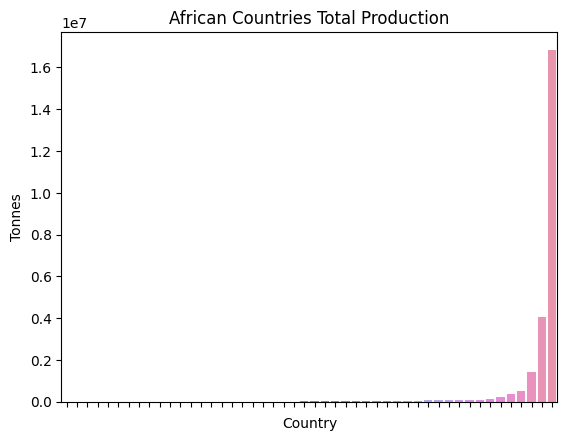

In [9]:
g = sns.barplot(data=total_production_africa_country, x = 'Country', y = 'Tonnes')
g.set(xticklabels=[], title = 'African Countries Total Production');

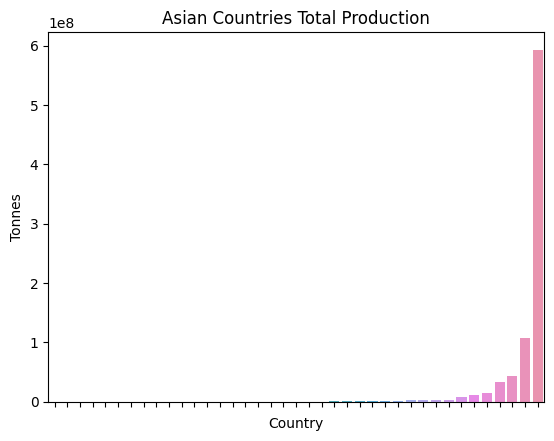

In [10]:
g = sns.barplot(data=total_production_asia_country, x = 'Country', y = 'Tonnes')
g.set(xticklabels=[], title = 'Asian Countries Total Production');

In [11]:
total_production_africa_country.tail(5)

,Country,Tonnes,Tonnes_Per_Million_People
46,Zambia,3.502791e+05,19053.522487
18,Ghana,5.280380e+05,16993.499810
45,Uganda,1.408853e+06,30800.662084
33,Nigeria,4.045255e+06,19623.863876
12,Egypt,1.684887e+07,164645.239933


In [12]:
total_production_asia_country.tail(5)

,Country,Tonnes,Tonnes_Per_Million_People
24,Myanmar,1.468421e+07,269881.744594
3,Bangladesh,3.387904e+07,205714.754545
11,Indonesia,4.292044e+07,156916.771610
10,India,1.068598e+08,77434.378587
7,China,5.930184e+08,412011.830071


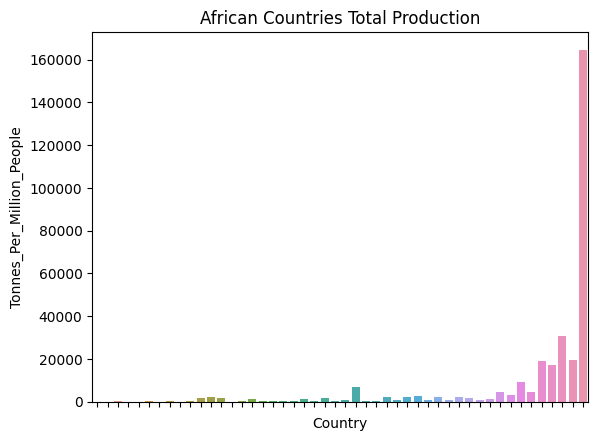

In [13]:
g = sns.barplot(data=total_production_africa_country, x = 'Country', y = 'Tonnes_Per_Million_People')
g.set(xticklabels=[], title = 'African Countries Total Production');

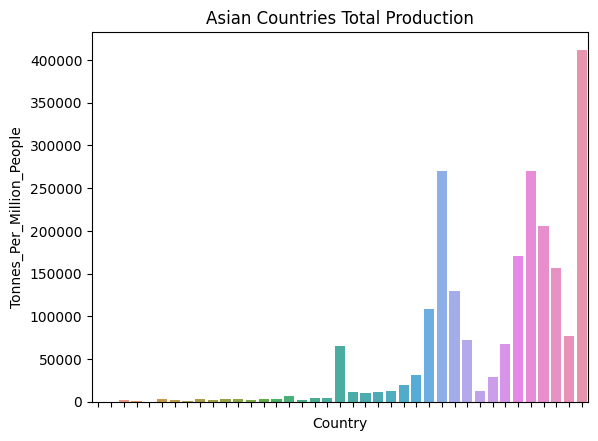

In [14]:
g = sns.barplot(data=total_production_asia_country, x = 'Country', y = 'Tonnes_Per_Million_People')
g.set(xticklabels=[], title = 'Asian Countries Total Production');

In [15]:
egypt_uganda = aquaculture_quantity_value[aquaculture_quantity_value['Country'].isin(['Egypt', 'Uganda'])].groupby(['PERIOD', 'Environment', 'Country'], as_index=False)['Tonnes_Per_Million_People'].sum()

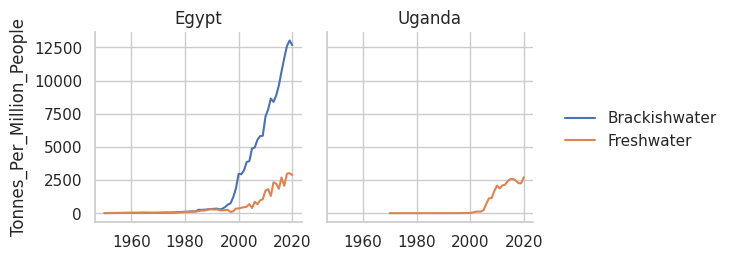

In [16]:
sns.set_theme(style = "whitegrid")
g = sns.FacetGrid(egypt_uganda, col = "Country", hue = 'Environment', 
                  sharey = True, margin_titles = True)
g.set_titles(col_template = '{col_name}')
g.map(sns.lineplot, 'PERIOD', 'Tonnes_Per_Million_People')
g.add_legend()
g._legend.set_title("")
g.set(xlabel = None)

So now we only want to focus on the freshwater. 